In [1]:
'''
Xola Ndaliso - June 2019

Calculating the cosmological 2-point
correlation function 
'''

'\nXola Ndaliso - June 2019\n\nCalculating the cosmological 2-point\ncorrelation function \n'

### In this cell the random field R is defined. Due to the computing power of the machine(laptop) used in this work only one random field was defined.

In [1]:
import numpy as np
import pylab as pl

np.random.seed(0)                        #to keep same R field for all the calculations
R = np.random.uniform(0, 1000, (9404, 2))   #defining Random R field

### Below, the first dataset is read and the angular separations (i.e. $\theta_{ij}$) of galaxies within this dataset are calculated using $\theta_{ij}$ = $\sqrt{(x_j - x_i)^2 + (y_j - y_i)^2}$. The resulting values are stored in the list theta_ij_d1. Furthermore, angular separation between the R field and the first data set are calculated and stored in list theta_dr1.  Both of the lists are converted into numpy arrays to make calculations less complex. Unlike for two different fields, repetitions are avoided when computing angular separations within the same field. Comments are provided also for better understanding of the procedure.

In [2]:
data = np.loadtxt('P1data01.txt')  #reading the first data set
x, y = data[:,0], data[:,1]

#calculating angular separations from the first field
theta_ij_d1 = np.array([np.sqrt((x[j] - x[k])**2 + (y[j] - y[k])**2) for j in range(len(x)) for k in range(len(x))
                        if j < k])  #if j < k: to avoid repetion of pairs

#calculating ang. separation between two fields R and dataset1
theta_dr1 = np.array([np.sqrt((x[j] - R[:,0][k])**2 + (y[j] - R[:,1][k])**2) for j in range(len(x)) 
                      for k in range(len(x))]) #no need to check for repetitions here since it is different fields


### Calculated below is the angular separations between points of the random field (i.e R). This is used throughout the calculations to compute RR.

In [2]:
#calculating the angular separations within the R field
theta_r =  np.array([np.sqrt((R[:,0][j] - R[:,0][k])**2 + (R[:,1][j] - R[:,1][k])**2) for j in range(len(R[:,0])) 
            for k in range(len(R[:,0])) if j < k])  #if j < k: to avoid repetition of pairs

### Computed below is the number of pairs with $\theta_{ij}$ in between $\theta$ $\pm$ $\delta \theta$, where $\theta$ ranges from 0 to $\theta_{max}$ $\leq$ 1000 with $\delta \theta$ being the stepsize. This is done by looping through the pairs once and checking the indices of the desired pairs. The length of the resulting array is taken since this signifies how many pairs fall within a certain bin. Throughout this work $\delta \theta$ was chosen to 10. 

In [3]:
ang_scale = np.arange(0.0, 1010, 10)  #angular scales from 0.0 to theta_max with delta(theta) = 10

#selecting only the ang separations <= 1000
#ang separations greater > 1000 give unreliable statistics

t_d, t_dr = theta_ij_d1[np.where(theta_ij_d1 <= 1000)], theta_dr1[np.where(theta_dr1 <= 1000)]
t_r = theta_r[np.where(theta_r <= 1000)] 

#calculating the number of pairs falling with a certain bound 

pairs_d = [len(np.where((t_d <= ang_scale[i + 1]) & (t_d > ang_scale[i]))[0]) for i in range(len(ang_scale)) if i != 0
           if i + 1 < len(ang_scale)] #calculating DD i.e number of pairs that have a separation falling in between
                                     #theta +- dthetha/2

pairs_dr = [len(np.where((t_dr <= ang_scale[i + 1]) & (t_dr > ang_scale[i]))[0]) for i in range(len(ang_scale)) 
            if i != 0 if i + 1 < len(ang_scale)] #calculating DR

pairs_r = [len(np.where((t_r <= ang_scale[i + 1]) & (t_r > ang_scale[i]))[0]) for i in range(len(ang_scale)) if 
           i != 0 if i + 1 < len(ang_scale)] #calculating RR -- NB to be used throughout 

### Presented below is the plot of the estimator (i.e w($\theta$)) against the angular scale $\theta$ .

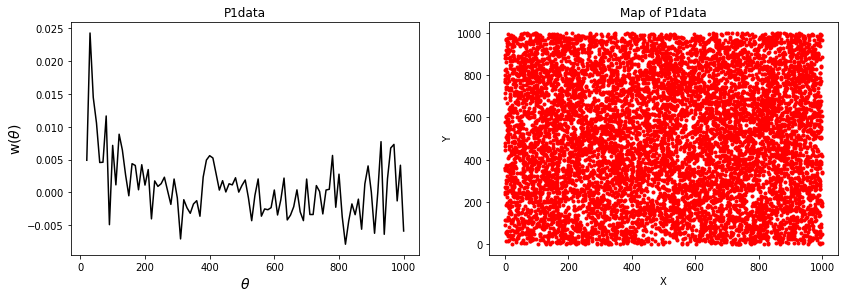

In [10]:
n, r = len(x) ,len(x)                                       #number of data points in each field D and R
DD, DR, RR = np.array(pairs_d), np.array(pairs_dr), (pairs_r)
w = (DD/RR)*((r*(r - 1))/(n*(n - 1))) - (DR/RR)*((r - 1)/n) + 1  #computing the estimator 

pl.subplot(221, title = 'P1data')
pl.plot(ang_scale[2:], w, 'k-')                                  #plotting the estimator against angular scale
pl.ylabel('w($\\theta$)', fontsize = 14)
pl.xlabel('$\\theta$', fontsize = 14)
#pl.savefig('P1data.png', format = 'png', dpi = 150)
pl.subplot(222, title = 'Map of P1data')
pl.plot(x, y, 'r.')
pl.xlabel('X')
pl.ylabel('Y')
#pl.savefig('Field_d1.png', format = 'png', dpi = 150)
pl.subplots_adjust(right = 1.9, top = 1.9)
pl.show()

### In the cells below the same exact procedure as above is repeated for the other three datasets.

## $\textit{With dataset 2}$

In [3]:
data = np.loadtxt('P1data02.txt')   #reading the second dataset
x, y = data[:,0], data[:,1]


#calculating the angular separation within the dataset
theta_ij_d2 = np.array([np.sqrt((x[j] - x[k])**2 + (y[j] - y[k])**2) for j in range(len(x)) for k in range(len(x)) 
                        if j < k])   #if j < k: to avoid repetions  
#calculating the angular separation between R and dataset 2            
theta_dr2 = np.array([np.sqrt((x[j] - R[:,0][k])**2 + (y[j] - R[:,1][k])**2) for j in range(len(x)) 
                      for k in range(len(x))])

In [4]:
ang_scale = np.arange(0.0, 1010, 10)  #angular scales from 0.01 to theta_max

#selecting only the angles <= 1000

t_d, t_dr = theta_ij_d2[np.where(theta_ij_d2 <= 1000)], theta_dr2[np.where(theta_dr2 <= 1000)]
#calculating the number of pairs falling with a certain bound

pairs_d = [len(np.where((t_d <= ang_scale[i + 1]) & (t_d > ang_scale[i]))[0]) for i in range(len(ang_scale)) if i != 0
           if i + 1 < len(ang_scale)] #calculating DD for the second data set

pairs_dr = [len(np.where((t_dr <= ang_scale[i + 1]) & (t_dr > ang_scale[i]))[0]) for i in range(len(ang_scale)) 
            if i != 0 if i + 1 < len(ang_scale)] #calculating DR for for the second dataset

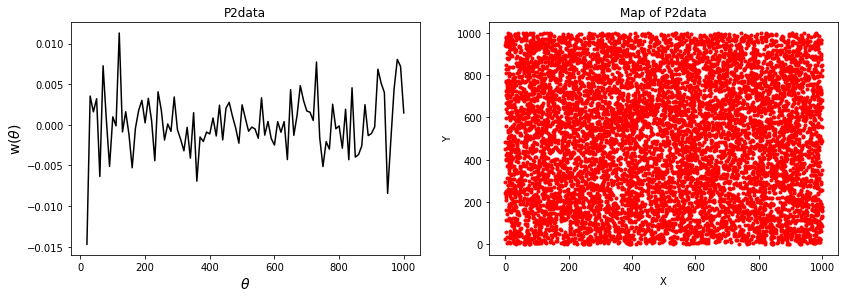

In [10]:
n, r = len(x) ,len(x)                                                 #number of data points in each dataset
DD, DR, RR = np.array(pairs_d), np.array(pairs_dr), (pairs_r)         #defining DD, DR and RR from the previous cell

w = (DD/RR)*((r*(r - 1))/(n*(n - 1))) - (DR/RR)*((r - 1)/n) + 1       #calculating the estimator 

pl.subplot(221, title = 'P2data')
pl.plot(ang_scale[2:], w, 'k-')                             #plotting the estimator against the angular scale
pl.ylabel('w($\\theta$)', fontsize = 14)
pl.xlabel('$\\theta$', fontsize = 14)
#pl.savefig('P2data.png', format = 'png', dpi = 150)

pl.subplot(222, title = 'Map of P2data')
pl.plot(x, y, 'r.')     #plotting the field of dataset 2
pl.xlabel('X')
pl.ylabel('Y')
pl.subplots_adjust(right = 1.9, top = 1.9)
pl.show()

## $\textit{With dataset 3}$

In [11]:
data = np.loadtxt('P1data03.txt') #reading the third dataset
x, y = data[:,0], data[:,1]

#calculating the angular separation within the dataset
theta_ij_d3 = np.array([np.sqrt((x[j] - x[k])**2 + (y[j] - y[k])**2) for j in range(len(x)) for k in range(len(x)) 
                        if j < k]) #if j < k: to avoid repetions  

            
theta_dr3 = np.array([np.sqrt((x[j] - R[:,0][k])**2 + (y[j] - R[:,1][k])**2) for j in range(len(x)) 
                      for k in range(len(x))]) #calculating the angular separation between R and dataset 3    

In [12]:
ang_scale = np.arange(0.0, 1010, 10)  #angular scales from 0.01 to theta_max

#selecting only the angles <= 1000

t_d, t_dr = theta_ij_d3[np.where(theta_ij_d3 <= 1000)], theta_dr3[np.where(theta_dr3 <= 1000)]
#calculating the number of pairs falling with a certain bound

pairs_d = [len(np.where((t_d <= ang_scale[i + 1]) & (t_d > ang_scale[i]))[0]) for i in range(len(ang_scale)) if i != 0
           if i + 1 < len(ang_scale)] #calculating DD for the second data set

pairs_dr = [len(np.where((t_dr <= ang_scale[i + 1]) & (t_dr > ang_scale[i]))[0]) for i in range(len(ang_scale)) 
            if i != 0 if i + 1 < len(ang_scale)] #calculating DR for for the second dataset


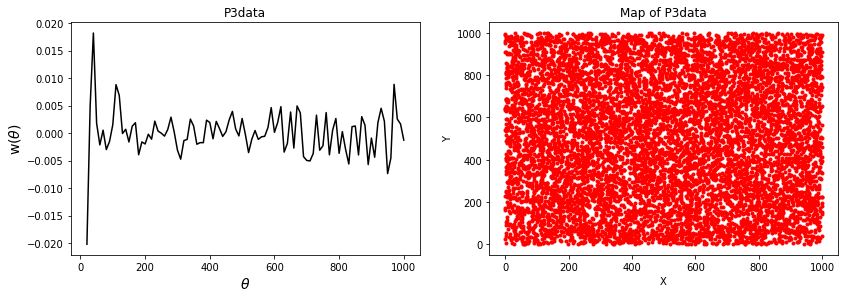

In [14]:

n, r = len(x) ,len(x)                                                 #number of data points in each dataset
DD, DR, RR = np.array(pairs_d), np.array(pairs_dr), (pairs_r)
w = (DD/RR)*((r*(r - 1))/(n*(n - 1))) - (DR/RR)*((r - 1)/n) + 1       #calculating the estimator 
pl.subplot(221, title = 'P3data')
pl.plot(ang_scale[2:], w, 'k-')                                    #plotting the estimator against angular scale  
pl.ylabel('w($\\theta$)', fontsize = 14)
pl.xlabel('$\\theta$', fontsize = 14)
#pl.savefig('P3data.png', format = 'png', dpi = 150)

pl.subplot(222, title = 'Map of P3data')
pl.plot(x, y, 'r.')    #plottting the field of dataset 3
pl.xlabel('X')
pl.ylabel('Y')
pl.subplots_adjust(right = 1.9, top = 1.9)
pl.show()

## $\textit{With dataset 4}$

In [4]:
data = np.loadtxt('P1data04.txt')#reading the fourth dataset
x, y = data[:,0], data[:,1]
#calculating the angular separation within the dataset

theta_ij_d4 = np.array([np.sqrt((x[j] - x[k])**2 + (y[j] - y[k])**2) for j in range(len(x)) for k in range(len(x))
                        if j < k]) #if j < k: to avoid repetions  

 #calculating the angular separation between R and dataset 4           
theta_dr4 = np.array([np.sqrt((x[j] - R[:,0][k])**2 + (y[j] - R[:,1][k])**2) for j in range(len(x)) for k in range(len(x))])

In [5]:
ang_scale = np.arange(0.0, 1010, 10)  #angular scales from 0.01 to theta_max

#selecting only the angles <= 1000

t_d, t_dr = theta_ij_d4[np.where(theta_ij_d4 <= 1000)], theta_dr4[np.where(theta_dr4 <= 1000)]
#calculating the number of pairs falling with a certain bound

pairs_d = [len(np.where((t_d <= ang_scale[i + 1]) & (t_d > ang_scale[i]))[0]) for i in range(len(ang_scale)) if i != 0
           if i + 1 < len(ang_scale)]
pairs_dr = [len(np.where((t_dr <= ang_scale[i + 1]) & (t_dr > ang_scale[i]))[0]) for i in range(len(ang_scale)) 
            if i != 0 if i + 1 < len(ang_scale)]

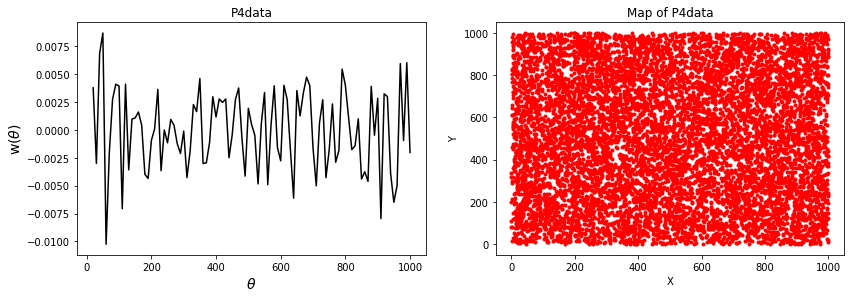

In [6]:

n, r = len(x) ,len(x)                                                 #number of data points in each dataset
DD, DR, RR = np.array(pairs_d), np.array(pairs_dr), (pairs_r)
w = (DD/RR)*((r*(r - 1))/(n*(n - 1))) - (DR/RR)*((r - 1)/n) + 1  #calculating the estimator for 4th dataset 

pl.subplot(221, title = 'P4data')
pl.plot(ang_scale[2:], w, 'k-')
pl.ylabel('w($\\theta$)', fontsize = 14)
pl.xlabel('$\\theta$', fontsize = 14)

pl.subplot(222, title = 'Map of P4data')
pl.plot(x, y, 'r.')                                    #plotting a field of dataset 4
pl.xlabel('X')
pl.ylabel('Y')
pl.subplots_adjust(right = 1.9, top = 1.9)
pl.show()

## $\textit{Conclusions}$

### Upon visual analysis of each two-point correlation function plots above,  the dataset found to be representing galaxy clustering is dataset 4 (i.e P1data04.txt). This is due to the severe fluctuations of the estimator (i.e. $w(\theta)$) about the value 0. From the other three datasets it is quite noticeable that the estimator tends to zero, this canb be seen from their flat behavior as you move towards higher values of $\theta$. This would even be more clear if 10 random R fields were used instead of just one. 